In [1]:
import numpy as np
import networkx as nx
import pylab as pl

In [6]:
graph = [(0,1), (0,2), (0,3), (0,4), (0,6), (1,0), (2,0), (2,1), (3,1), (3,2), (3,4), (4,0), (4,2), (4,3), (4,5), (5,0), (5,4), (6,4)]
graph = [(0,1), (0,2), (0,3), (1,0), (1,3), (2,1), (2,3), (3,0)]

In [3]:
def convert_to_numpy(graph):
    g = np.array([],dtype=np.int32)
    for e in graph:
        g = np.append(g,np.array(e))
    g = g.reshape((len(g)//2,2))
    return g

In [4]:
def calc_pagerank(edges,damping_factor = 0.15):
    nnodes = np.max(edges)+1
    # Make the transition matrix
    trans = np.zeros((nnodes,nnodes))
    for i in range(nnodes):
        # Find the inlinks
        inlinks = np.squeeze(edges[np.where(edges[:,1]==i),0])
        # Make sure Numpy didn't stop it being an array
        if inlinks.ndim==0:
            inlinks = [inlinks]
        # Compute the outdegrees
        for inlink in inlinks:
            outdegree = len(np.where(edges[:,0]==inlink)[0])
            trans[i,inlink] = 1/outdegree

    # Initialise the pageranks as 1/n
    pagerank = np.ones((nnodes,1))/nnodes
    oldpagerank = np.copy(pagerank)
    # Calculate one step
    pagerank = (1-damping_factor)*trans@pagerank + damping_factor/nnodes

    tol = 0.001
    # While the pagerank is still updating, compute the next iteration as a matrix multiplication
    while np.linalg.norm(oldpagerank-pagerank)>tol:
        oldpagerank = np.copy(pagerank)
        pagerank = (1-damping_factor)*trans@pagerank + damping_factor/nnodes
        # Normalise the probabilities (only needed if damping factor > 0)
        pagerank = pagerank/np.sum(pagerank)
    return pagerank

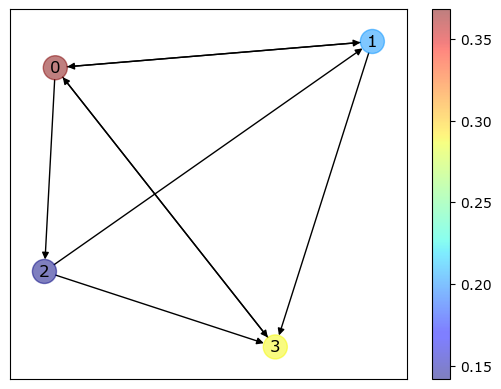

In [7]:
pagerank = calc_pagerank(convert_to_numpy(graph),0.15)
g = nx.DiGraph(graph)
pos=nx.spring_layout(g)
n = nx.draw_networkx_nodes(g, pos, node_color=pagerank,cmap='jet',alpha=0.5)
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g,pos,arrows=True)
pl.colorbar(n)